In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator

In [2]:
TRAIN_PATH = r'D:/dataset/Train'
VAL_PATH = r'D:/dataset/Test'
BATCH_SIZE=16
r=4
c=4
#CATEGORIES = ['Air_trapping', 'Aortic_elongation','COPD_Signs','Calcified_granuloma','Callus_rib_fracture','Hiatal_hernia','Kyphosis','Laminar_atelectasis','Normal','Pleural_effusion','Scoliosis','Vascular_hilar_enlargement']

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='categorical', 
                                            
                                                  batch_size=BATCH_SIZE, 
                                                  target_size=(256, 256),
                                                  shuffle=True,
                                                  seed=42
                                                  )

Found 34387 images belonging to 12 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='categorical', 
                                          
                                                batch_size=BATCH_SIZE, 
                                                target_size=(256, 256),
                                                shuffle=True,
                                                seed=42
                                                )

Found 8597 images belonging to 12 classes.


In [5]:
#'''
import tensorflow as tf
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=12,
    classifier_activation="softmax",
)
model.summary()
#'''

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [6]:
import tensorflow as tf
#from t.keras.optimizers import Adam, RMSprop, SGD
adam_opt = tf.keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-4)
#sgd_opt = tf.keras.optimizers.SGD(lr=1e-06, momentum=0.9, decay=0.0, nesterov=False)
#rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#import keras
import tensorflow.keras as keras
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('adam_baseline_vgg.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, verbose=1, patience=5, mode='max')]


In [8]:
history  = model.fit(train_batches, 
         steps_per_epoch=train_batches.n//train_batches.batch_size,
         validation_data=val_batches, 
         validation_steps=val_batches.n//val_batches.batch_size, 
         epochs=20, 
         verbose=1,
         callbacks = callbacks)

Epoch 1/20
2149/2149 [==============================] - 849s 395ms/step - loss: 0.9294 - accuracy: 0.7935 - val_loss: 0.9036 - val_accuracy: 0.7939
Epoch 2/20
2149/2149 [==============================] - 567s 264ms/step - loss: 0.9072 - accuracy: 0.7940 - val_loss: 0.8992 - val_accuracy: 0.7939
Epoch 3/20
2149/2149 [==============================] - 580s 270ms/step - loss: 0.9009 - accuracy: 0.7940 - val_loss: 0.9093 - val_accuracy: 0.7940
Epoch 4/20
2149/2149 [==============================] - 604s 281ms/step - loss: 0.8966 - accuracy: 0.7940 - val_loss: 0.8920 - val_accuracy: 0.7939
Epoch 5/20
2149/2149 [==============================] - 587s 273ms/step - loss: 0.8921 - accuracy: 0.7939 - val_loss: 0.8917 - val_accuracy: 0.7939
Epoch 6/20
2149/2149 [==============================] - 569s 265ms/step - loss: 0.8898 - accuracy: 0.7940 - val_loss: 0.8910 - val_accuracy: 0.7938
Epoch 7/20
2149/2149 [==============================] - 568s 264ms/step - loss: 0.8872 - accuracy: 0.7939 - val_

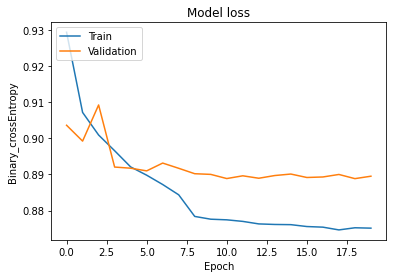

In [9]:
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show() 

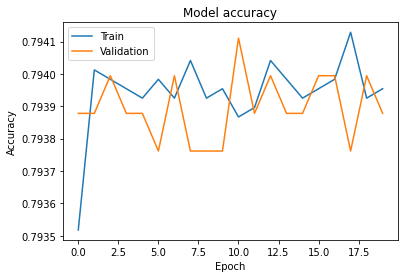

In [10]:
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))

Lowest training loss:  0.8746287822723389
Lowest validation loss:  0.8888369202613831
Highest training accuracy:  0.7941287755966187
Highest validation accuracy:  0.7941107749938965


In [15]:
#from IPython.display import FileLink
#FileLink('./baseline_vgg.h5')


In [14]:
model.save("baseline_vgg.h5")